<div style="max-width:66ch;">

# Lecture notes - CART - Classification and regression trees

This is the lecture note for **decision tree**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to decision tree. I encourage you to read further about decision trees. </p>

Read more:
- [DecisionTreeClassifier sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [DecisionTreeRegressor sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- [Decision trees sklearn theory](https://scikit-learn.org/stable/modules/tree.html)
- [Decision tree learning wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)

</div>


In [7]:
from sklearn.datasets import load_wine
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

df = pd.read_csv("../data/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [9]:
df.dropna(inplace=True)

<Axes: xlabel='Years', ylabel='Hits'>

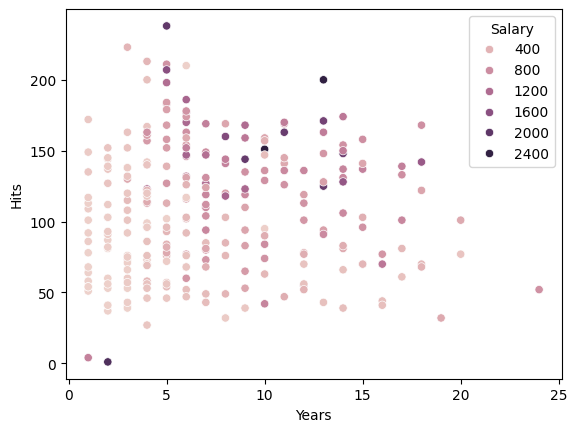

In [10]:
sns.scatterplot(data = df, x = "Years", y="Hits", hue="Salary")


<div style="max-width:66ch;">

## Decision tree regression

The goal is to stratify or segment the players into several regions. In decision tree for regression, the algorithm creates a tree to minimize the RSS (residual sum of squares). The tree-building process uses recursive binary splitting, a top-down greedy approach to divide the predictor space into branches. For example the baseball dataset with years and hits we could have a split into the following regions: 

$R_1 = \{X|Years < 4.5\}, R_2 = \{X|Years \ge 4.5, Hits < 117.5\}, R_3 = \{X|Years \ge 4.5, Hits \ge 117.5\}$

For decision trees, you shouldn't scale the data.

</div>

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model_tree_reg = DecisionTreeRegressor(max_depth=2)

X, y = df[["Years", "Hits"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((210, 2), (53, 2))

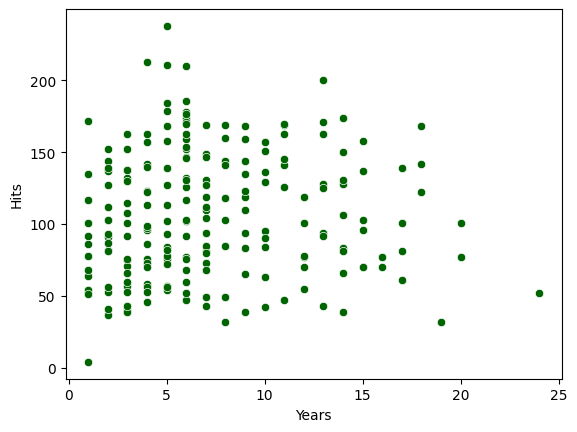

In [12]:
sns.scatterplot(data=X_train, x="Years", y="Hits", color="darkgreen");

Text(0.5, 1.0, 'Salary histogram of test data')

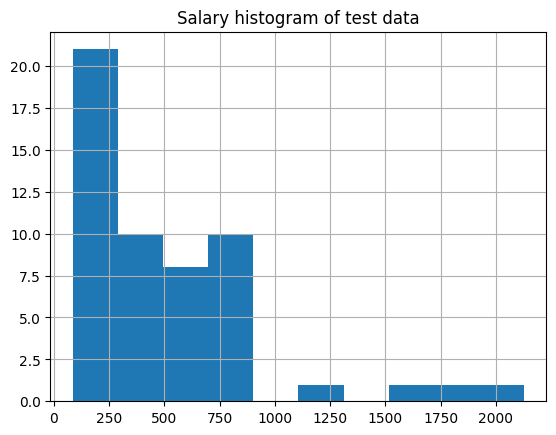

In [14]:
y_test.hist()
plt.title("Salary histogram of test data")

In [16]:
model_tree_reg.fit(X_train, y_train)
print("years, hits")
model_tree_reg.feature_importances_
# we see that years have higher feature importance than hits

years, hits


array([0.58742156, 0.41257844])

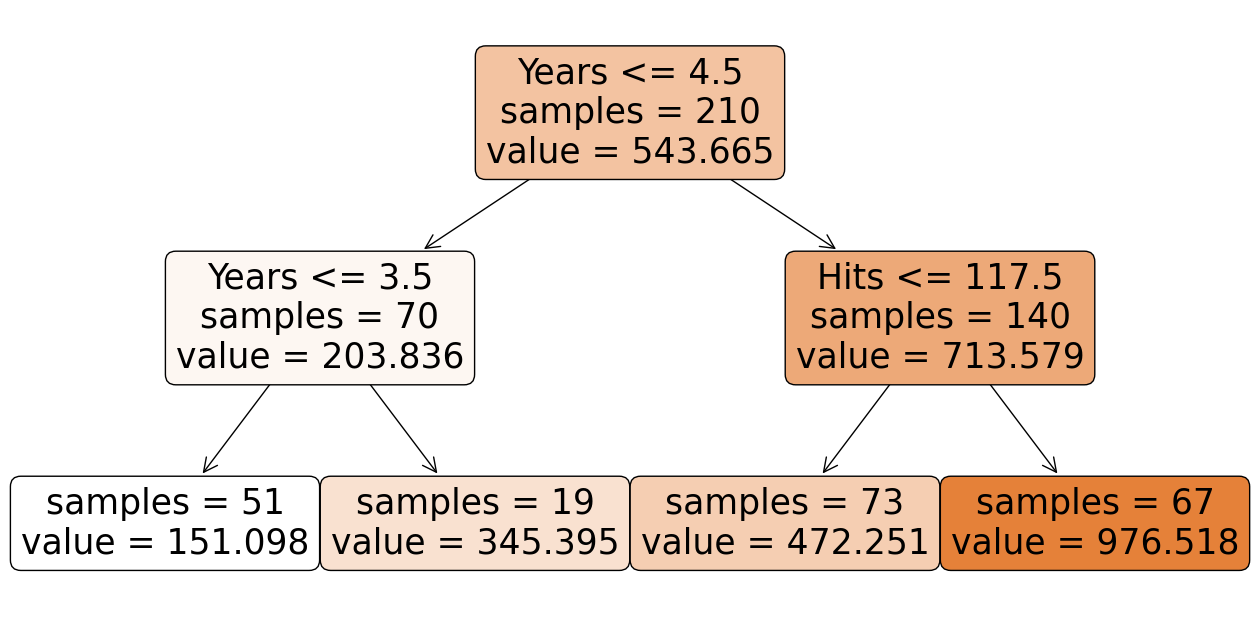

In [17]:
from sklearn import tree

fig, ax = plt.figure(figsize=(16,8), dpi=100), plt.axes()
tree.plot_tree(model_tree_reg, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);

In [18]:
# Exercise: parse this data and extract the threshold
print(tree.export_text(model_tree_reg, feature_names = list(X_train.columns)))

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [151.10]
|   |--- Years >  3.50
|   |   |--- value: [345.39]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- value: [472.25]
|   |--- Hits >  117.50
|   |   |--- value: [976.52]



In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model_tree_reg.predict(X_test)

print("MAE, RMSE")
mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

MAE, RMSE


(235.00675815373418, 379.69119483603174)

<div style="max-width:66ch;">

## Decision tree classification

As in the regression case, the tree is grown through recursive binary splitting that minimizes a loss function locally. However RSS can't be used as loss function in classification. Instead Gini impurity or cross-entropy can be used. 

Both Gini impurity and cross entropy measures a nodes purity, with a small value showing that most of the observations come from one class.

</div>

In [28]:
df = pd.read_csv("../data/Default.csv")
df = pd.get_dummies(df, drop_first=True)
df[["default_Yes", "student_Yes"]] = df[["default_Yes", "student_Yes"]].astype(int)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [29]:
X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 3), (2000, 3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.32      0.30      0.31        69

    accuracy                           0.95      2000
   macro avg       0.65      0.64      0.64      2000
weighted avg       0.95      0.95      0.95      2000



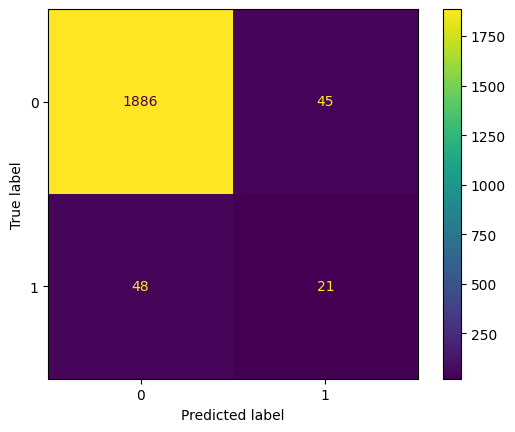

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

<div style="max-width:66ch;">

## Summary

In this lecture we've covered the concepts of CART - classification and regression decision tree. We have gone through how to visualize each tree and worked through an example in regression and one in classification.

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
